# Predict survial of the Titanic 

### Fundamental analysis on the famous Titanic Dataset using the logistic Regression and Visualization with seaborn.

#### Importing the train and test dataset 

In [1]:
import numpy as np
import pandas as pd
import csv 

train = pd.read_csv('G:/My Data Science files/Logistic Regression/train.csv')
test = pd.read_csv('G:/My Data Science files/Logistic Regression/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# To find the number of missing values in a dataframe

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# dropping the irrelevant columns
train1 = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# nice way to encode the categorical values 
cleanup_nums = {"Pclass":     {1: "High Class", 2:"Medium Class" , 3:"Lower Class"}}
train1.replace(cleanup_nums, inplace=True)
train1.head()
        

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Lower Class,male,22.0,1,0,7.2500,S
1,1,High Class,female,38.0,1,0,71.2833,C
2,1,Lower Class,female,26.0,0,0,7.9250,S
3,1,High Class,female,35.0,1,0,53.1000,S
4,0,Lower Class,male,35.0,0,0,8.0500,S


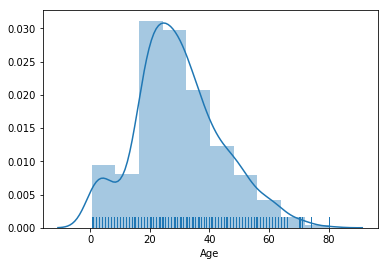

In [6]:
# grouping the age and fare 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

age = train1['Age'].dropna(axis=0)
age.to_string

sns.distplot(age,bins=10,kde=True,rug=True)

# there are two ways to handle this missing values either we can impute the data using the regression or 
# we can remove those values


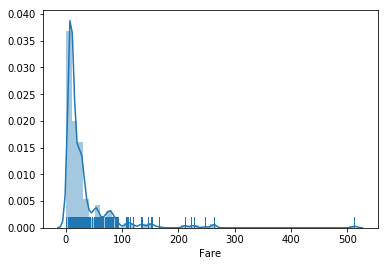

In [7]:
# distribution of the fare 
fare = train1['Fare']
fare.to_string
sns.distplot(fare,kde=True,rug=True)

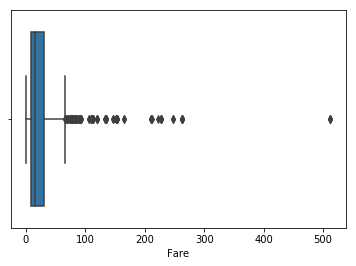

In [8]:
sns.boxplot(fare)

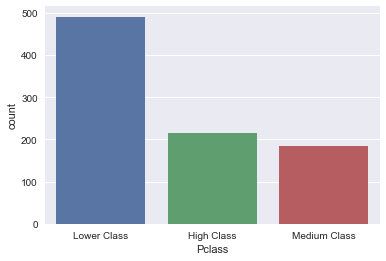

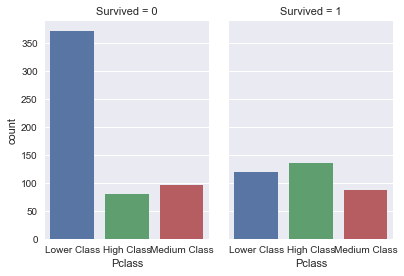

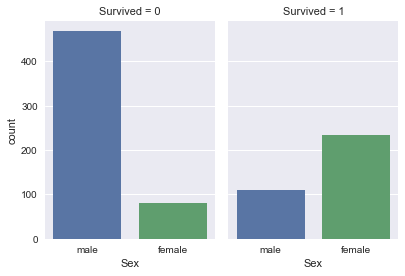

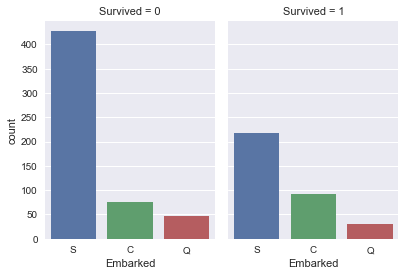

In [9]:
sns.set(style="darkgrid")
bar = sns.countplot(x="Pclass", data=train1)
g = sns.factorplot(x="Pclass", col="Survived", data=train1, kind="count", size=4, aspect=.7);
h = sns.factorplot(x="Sex", col="Survived", data=train1, kind="count", size=4, aspect=.7);
embarked = sns.factorplot(x="Embarked", col="Survived", data=train1, kind="count", size=4, aspect=.7);

In [10]:
# importing the age through regression analysis

#target = train1.loc[:,'Survived']
#data_wo_survived = train1.iloc[:,1:]

agetest = train1[train1['Age'].isnull()]


train1['Age']  = train1['Age'].fillna(9999)

agetrain = train1[train1['Age'] != 9999]

agetrain.describe()


# running regression analysis


agetrain = pd.get_dummies(agetrain)

agetrain.columns


Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_High Class',
       'Pclass_Lower Class', 'Pclass_Medium Class', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [11]:
agetest.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
agetest = agetest.iloc[:,[0,1,2,4,5,6,7]]

In [13]:
agetest.head()
agetest = pd.get_dummies(agetest)

In [14]:
agetest.columns

Index(['Survived', 'SibSp', 'Parch', 'Fare', 'Pclass_High Class',
       'Pclass_Lower Class', 'Pclass_Medium Class', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Coefficients:  [ -3.89188815  -0.7039223   -0.0221094    8.75649705  -6.7568533
  -1.99964375  -1.52891861   1.52891861 -12.99425641  -7.76204648
 -10.25152765]
Intercept:  44.5411738167
Variance score: 0.25
Mean squared error: 157.97


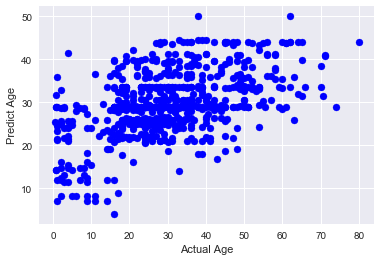

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
survive_data_agetrain = agetrain.iloc[:,0]
survive_data_agetest = agetest.iloc[:,0]

agetest_wo_survive = agetest.iloc[:,1:]

agetrain_Y = agetrain.iloc[:,1]
agetrain_X = agetrain.iloc[:,2:]

regr = linear_model.LinearRegression()
regr.fit(agetrain_X, agetrain_Y)


# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)


agetrain_Y_predict = regr.predict(agetrain_X)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(agetrain_Y, agetrain_Y_predict))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(agetrain_Y, agetrain_Y_predict))

# Plot outputs

plt.scatter(agetrain_Y, agetrain_Y_predict, color='blue')
plt.xlabel('Actual Age')
plt.ylabel('Predict Age')

plt.show()

In [16]:
# Using Statsmodels library to find the linear regression using OLS method.

import statsmodels.api as sm
import matplotlib.pyplot as plt


model = sm.OLS(agetrain_Y, agetrain_X)
results = model.fit()
print(results.summary())

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     26.12
Date:                Mon, 13 Nov 2017   Prob (F-statistic):           5.18e-39
Time:                        02:48:53   Log-Likelihood:                -2820.4
No. Observations:                 714   AIC:                             5661.
Df Residuals:                     704   BIC:                             5707.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
SibSp                  -3.8919    

### Since the R2 is pretty low for the model, hence we will try for other regression methods. 


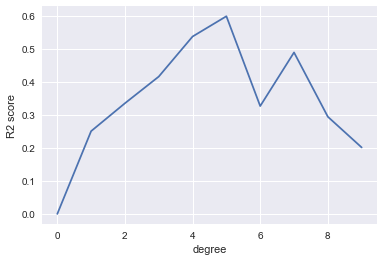

In [17]:
from sklearn.preprocessing import PolynomialFeatures

x = [0]
y = [0]


for i in np.arange(1,10,1):
    poly = PolynomialFeatures(degree=i,include_bias = False)
    X_poly = poly.fit_transform(agetrain_X)

    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X_poly,agetrain_Y)
    agetrain_Y_pred = lin_reg.predict(X_poly)
    x.append(i)
    a = r2_score(agetrain_Y, agetrain_Y_pred)
    y.append(a)

plt.plot(x,y)
plt.xlabel("degree")
plt.ylabel("R2 score")
plt.show()



### Since at polynomial degree = 5 we are getting a suitable R2 score 
### ,therefore we will be using polynimial regression of degree 5, to calculate the missing age. 

In [18]:
poly = PolynomialFeatures(degree=5,include_bias = False)
X_poly = poly.fit_transform(agetrain_X)
agetest_poly = poly.fit_transform(agetest_wo_survive)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly,agetrain_Y)

agetest_Y_pred = lin_reg.predict(agetest_poly)

int_agetest_Y=[]
for i in agetest_Y_pred:
    int_agetest_Y.append(int(i))
    




In [19]:
age_pred = np.array(int_agetest_Y)
age_predict = pd.DataFrame(age_pred,columns=['Age'])
age_predict = age_predict.reset_index()
agetest_wo_survive = agetest_wo_survive.reset_index()
survive_data_agetest = survive_data_agetest.reset_index()

agetest1 = pd.concat([survive_data_agetest,agetest_wo_survive,age_predict],axis=1)


In [20]:
agetest1 = agetest1.drop(['index','level_0'],axis=1)

In [21]:
agetest1.head()

,Survived,SibSp,Parch,Fare,Pclass_High Class,Pclass_Lower Class,Pclass_Medium Class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
0,0,0,0,8.4583,0,1,0,0,1,0,1,0,95
1,1,0,0,13.0000,0,0,1,0,1,0,0,1,33
2,1,0,0,7.2250,0,1,0,1,0,1,0,0,14
3,0,0,0,7.2250,0,1,0,0,1,1,0,0,29
4,1,0,0,7.8792,0,1,0,1,0,0,1,0,19


In [22]:
# dropping the rows with negative age 
agetest1 = agetest1.drop(agetest1[agetest1.Age < 0].index)

# dropping the rows with age > 100
agetest1 = agetest1.drop(agetest1[agetest1.Age > 100].index)

In [23]:

# joining the dataframe with age predicted and dataframe with available age.
train_final = pd.concat([agetest1,agetrain])



In [24]:
train_final.head()
#train_final.shape

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_High Class,Pclass_Lower Class,Pclass_Medium Class,Sex_female,Sex_male,SibSp,Survived
0,95.0,0,1,0,8.4583,0,0,1,0,0,1,0,0
1,33.0,0,0,1,13.0000,0,0,0,1,0,1,0,1
2,14.0,1,0,0,7.2250,0,0,1,0,1,0,0,1
3,29.0,1,0,0,7.2250,0,0,1,0,0,1,0,0
4,19.0,0,1,0,7.8792,0,0,1,0,1,0,0,1


### Checking for collinearity

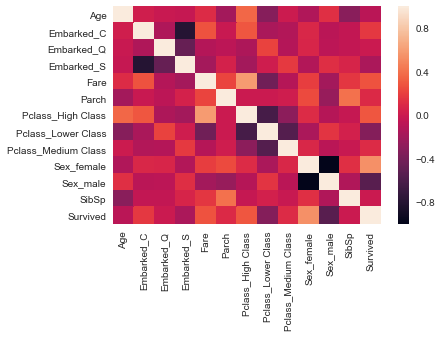

In [25]:
import seaborn as sb
sb.heatmap(train_final.corr())

In [26]:
train_final.corr()

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_High Class,Pclass_Lower Class,Pclass_Medium Class,Sex_female,Sex_male,SibSp,Survived
Age,1.000000,0.029511,-0.012771,-0.026256,0.102511,-0.189084,0.365630,-0.321185,0.004650,-0.128774,0.128774,-0.305680,-0.081162
Embarked_C,0.029511,1.000000,-0.138387,-0.803142,0.273551,-0.010164,0.296553,-0.156641,-0.123952,0.084137,-0.084137,-0.043817,0.166877
Embarked_Q,-0.012771,-0.138387,1.000000,-0.468976,-0.111601,-0.070661,-0.143063,0.215463,-0.112235,0.070473,-0.070473,-0.041573,-0.007497
Embarked_S,-0.026256,-0.803142,-0.468976,1.000000,-0.181780,0.053395,-0.187558,0.016988,0.179331,-0.123688,0.123688,0.066288,-0.150330
Fare,0.102511,0.273551,-0.111601,-0.181780,1.000000,0.219426,0.590834,-0.424403,-0.108830,0.191660,-0.191660,0.158250,0.274081
Parch,-0.189084,-0.010164,-0.070661,0.053395,0.219426,1.000000,-0.006362,-0.007558,0.016086,0.245051,-0.245051,0.401943,0.099255
Pclass_High Class,0.365630,0.296553,-0.143063,-0.187558,0.590834,-0.006362,1.000000,-0.629137,-0.293857,0.103927,-0.103927,-0.026003,0.290519
Pclass_Lower Class,-0.321185,-0.156641,0.215463,0.016988,-0.424403,-0.007558,-0.629137,1.000000,-0.558100,-0.153972,0.153972,0.041219,-0.335726
Pclass_Medium Class,0.004650,-0.123952,-0.112235,0.179331,-0.108830,0.016086,-0.293857,-0.558100,1.000000,0.078398,-0.078398,-0.022929,0.102714
Sex_female,-0.128774,0.084137,0.070473,-0.123688,0.191660,0.245051,0.103927,-0.153972,0.078398,1.000000,-1.000000,0.131345,0.540922


In [27]:
train_final = train_final.drop(['Embarked_S','Sex_female','Pclass_Lower Class'],axis=1)

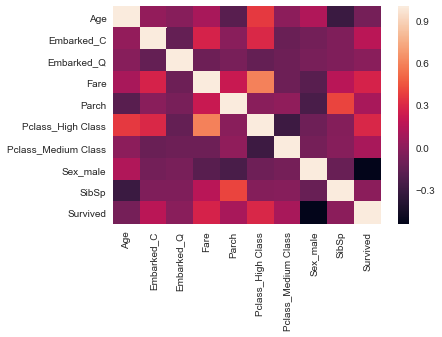

In [28]:
sb.heatmap(train_final.corr())

## Logistic Regression 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_target = train_final.iloc[:,-1]
X_var = train_final.iloc[:,:-1]

logistic = LogisticRegression()
logistic.fit(X_var,X_target)
X_pred = logistic.predict(X_var)

print("Accuracy : %.2f" % accuracy_score(X_target, X_pred))

Accuracy : 0.81


In [30]:
import statsmodels.api as sm

logit = sm.Logit(X_target,X_var)

result = logit.fit()

print (result.summary())

Optimization terminated successfully.
         Current function value: 0.457173
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  856
Model:                          Logit   Df Residuals:                      847
Method:                           MLE   Df Model:                            8
Date:                Mon, 13 Nov 2017   Pseudo R-squ.:                  0.3154
Time:                        02:52:01   Log-Likelihood:                -391.34
converged:                       True   LL-Null:                       -571.62
                                        LLR p-value:                 5.053e-73
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                    -0.0139      0.005     -2.584      0.010      -0.024      -0.003
Em

In [31]:
X_var = X_var.drop(['Fare','Parch','SibSp'],axis=1)

In [32]:
import statsmodels.api as sm

logit = sm.Logit(X_target,X_var)

result = logit.fit()

print (result.summary())

Optimization terminated successfully.
         Current function value: 0.459439
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  856
Model:                          Logit   Df Residuals:                      850
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Nov 2017   Pseudo R-squ.:                  0.3120
Time:                        02:52:21   Log-Likelihood:                -393.28
converged:                       True   LL-Null:                       -571.62
                                        LLR p-value:                 6.396e-75
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                    -0.0137      0.005     -2.609      0.009      -0.024      -0.003
Em

### odds ratio

In [36]:
import numpy as np
print (np.exp(result.params))

Age                    0.986430
Embarked_C             1.987977
Embarked_Q             2.073054
Pclass_High Class      9.843000
Pclass_Medium Class    4.817069
Sex_male               0.108160
dtype: float64


### odds ratio and 95%CI

In [37]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                         2.5%      97.5%        OR
Age                  0.976358   0.996606  0.986430
Embarked_C           1.283922   3.078107  1.987977
Embarked_Q           1.094328   3.927116  2.073054
Pclass_High Class    5.989871  16.174747  9.843000
Pclass_Medium Class  3.098452   7.488952  4.817069
Sex_male             0.075800   0.154336  0.108160


In [38]:

logistic = LogisticRegression()
logistic.fit(X_var,X_target)
X_pred = logistic.predict(X_var)

print("Accuracy : %.2f" % accuracy_score(X_target, X_pred))

Accuracy : 0.79


## Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(X_target, X_pred)

confusion_matrix

array([[447,  77],
       [103, 229]], dtype=int64)

## Classification Report 

In [40]:
from sklearn import metrics 
from sklearn.metrics import classification_report

print(classification_report(X_target, X_pred))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       524
          1       0.75      0.69      0.72       332

avg / total       0.79      0.79      0.79       856



In [43]:
test.head()
# dropping the irrelevant columns
test1 = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# nice way to encode the categorical values 
cleanup_nums = {"Pclass":     {1: "High Class", 2:"Medium Class" , 3:"Lower Class"}}
test1.replace(cleanup_nums, inplace=True)
test1.head()

test1 = pd.get_dummies(test1)

In [44]:
test1.head()
test1 = test1.drop(['Embarked_S','Sex_female','Pclass_Lower Class'],axis=1)

In [45]:
test1 = test1.drop(['Fare','Parch','SibSp'],axis=1)

## Predicting the values of test data

In [46]:
test1 = test1.dropna()

y_pred = logistic.predict(test1)


## Predicted Values

In [47]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1,

In [48]:
y = pd.DataFrame(y_pred,columns = ['Survived'])
test_pred = pd.concat([y,test],axis=1)